#  Calcul formel pour inférience bayésienne de processus de Poisson pour extremes


Il existe une librairie `stats` de Scipy pour les extrêmes la possibilité d'évaluer la cdf, pdf, etc., et même une fonction "fit" par MLE.

*Attention cependant* : `genextreme.pdf(x, c, loc, scale)` = $f_{GEV}(x|\mu, \sigma, -\xi)$  

### Classe pour la distribution GEV

In [1]:
import numpy as np
from sympy import *
from sympy.stats import *
import matplotlib.pyplot as plt

from GEV_rv import GEV_Variable

init_printing()

In [2]:
X = GEV_Variable()
X.get_cdf()

⎧         μ - x                  
⎪         ─────                  
⎪           σ                    
⎪       -ℯ                       
⎪      ℯ                for γ = 0
⎪                                
⎨                  -1            
⎪                  ───           
⎪                   γ            
⎪  ⎛γ⋅(-μ + x)    ⎞              
⎪ -⎜────────── + 1⎟              
⎪  ⎝    σ         ⎠              
⎩ℯ                      otherwise

In [3]:
X.def_set()


⎧⎛        σ⎤           
⎪⎜-∞, μ - ─⎥  for γ < 0
⎪⎝        γ⎦           
⎪                      
⎨  (-∞, ∞)    for γ = 0
⎪                      
⎪⎡    σ   ⎞            
⎪⎢μ - ─, ∞⎟   otherwise
⎩⎣    γ   ⎠            

In [4]:
X.eval_params(Mu=0, Sig=1, Gam=1)
print(X.eval_cdf(5))

0.846481724890614


In [5]:
X.def_set()

In [6]:
X.reparameterize()
X.eval_params(Gam=0)
X.eval_cdf(5)

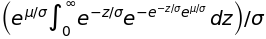

In [7]:
R = X.sympy_rv()
P(R>0)

In [8]:

X.eval_params(Mu=0, Sig=1)
R = X.sympy_rv()
P(R>0)

# Processus de Poisson

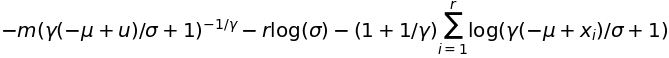

In [9]:
mu, sig, gam = symbols("mu sigma gamma")

m, u, r = symbols("m u r")

x = IndexedBase("x")
i = Symbol("i")


likelihood_PP = -m*(1 + gam * (u - mu) / sig) ** (-1 / gam) \
                - r*log(sig) \
                - (1/gam + 1)*Sum(log(1 + gam * (x[i] - mu) / sig), (i, 1, r))

likelihood_PP

In [10]:
observed_inf = [diff(likelihood_PP, mu, mu), diff(likelihood_PP, mu, sig), diff(likelihood_PP, mu, gam), 
                diff(likelihood_PP, sig, sig), diff(likelihood_PP, sig, gam),
                diff(likelihood_PP, gam, gam)]

observed_fish = [0, 0, 0, 0, 0, 0]

Pour la suite on pose $v = \frac{u-\mu}{\sigma}$ et $z_i = \frac{x_i-\mu}{\sigma}$ 

In [11]:
# !pip install antlr4-python3-runtime==4.7.1

from sympy.parsing.latex import parse_latex

# Test : 
parse_latex(r"\frac{1}{x}")

v = symbols("v")

z = IndexedBase("z")

## Calcul de $\frac{\partial^2 l}{\partial\mu^2}$ :

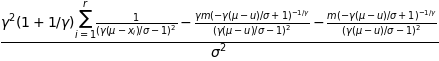

In [12]:
observed_inf[0]

Version après simplification :

$$
\frac{\partial^2 l}{\partial \mu^2} = 
\frac{\gamma(\gamma+1)}{\sigma^2} \sum_{i=1}^r \left(1+\gamma z_i\right)^{-2} -\frac{m(\gamma+1)}{\sigma^2}\left(1+\gamma v\right)^{-1/\gamma - 2}
$$

Or on a 
$$
E_{N,Z}\left[\sum_{i=1}^N \{1+\gamma Z_i\}_+^{-2}\right] =
\frac{m}{2\gamma+1} \{1+\gamma v\}_+^{-1/\gamma-2}.
$$

Donc on obtient
$$
E\left[-\frac{\partial^2 l}{\partial \mu^2}\right] 
= -\frac{m\gamma(\gamma+1)}{(2\gamma+1)\sigma^2} (1+\gamma v)^{-1/\gamma-2} 
  +\frac{m(\gamma+1)}{\sigma^2}\left(1+\gamma v\right)^{-1/\gamma - 2} 
=  \frac{m(\gamma+1)^2}{\sigma^2(2\gamma+1)} (1+\gamma v)^{-1/\gamma-2} 
$$




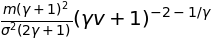

In [13]:
observed_fish[0] = parse_latex(r"\frac{(\gamma+1)^2 m}{\sigma^2(2\gamma+1)} (1+\gamma v)^{-1/\gamma-2}")

observed_fish[0]

## Calcul de $\frac{\partial^2 l}{\partial\mu\partial\sigma}$ :

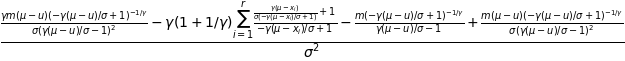

In [14]:
observed_inf[1]

Version après simplification :

$$
\frac{\partial^2 l}{\partial \mu \partial \sigma} = 
- \frac{m(\gamma+1)}{\sigma^2} v \left(1+\gamma v\right)^{-1/\gamma -2} 
- \frac{\gamma+1}{\sigma^2} \sum_{i=1}^r \left(1+\gamma z_i\right)^{-1} 
+ \frac{\gamma(\gamma+1)}{\sigma^2} \sum_{i=1}^r z_i \left(1+\gamma z_i\right)^{-2} 
+ \frac{m}{\sigma^2} \left(1+\gamma v\right)^{-1/\gamma - 1} 
$$

Or 

$$
    E_{N,Z}\left[\sum_{i=1}^N \{1+\gamma Z_i\}_+^{-1}\right] 
    = \frac{m}{\gamma+1} \{1+\gamma v\}_+^{-1/\gamma-1} \quad \text{ et } \quad
    E_{N,Z}\left[\sum_{i=1}^N Z_i\{1+\gamma Z_i\}_+^{-2}\right] =
    \frac{m(1+v+2\gamma v)}{(\gamma+1)(2\gamma+1)} \{1+\gamma v\}_+^{-1/\gamma-2}
$$

Donc 

$$
E\left[-\frac{\partial^2 l}{\partial \mu \partial \sigma}\right] = 
  \frac{m(\gamma+1)}{\sigma^2} v \left(1+\gamma v\right)^{-1/\gamma -2} 
+ \frac{m}{\sigma^2} (1+\gamma v)^{-1/\gamma-1}
- \frac{\gamma}{\sigma^2} \frac{m(1+v+2\gamma v)}{2\gamma+1} (1+\gamma v)^{-1/\gamma-2}
- \frac{m}{\sigma^2} \left(1+\gamma v\right)^{-1/\gamma - 1} 
$$

Après simplification :

$$
E\left[-\frac{\partial^2 l}{\partial \mu \partial \sigma}\right] = 
  \frac{m}{\sigma^2} \left(v-\frac{\gamma}{1+2\gamma}\right) \left(1+\gamma v\right)^{-1/\gamma -2} 
$$


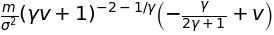

In [15]:
observed_fish[1] = parse_latex(r"\frac{m}{\sigma^2} (v-\frac{\gamma}{1+2\gamma}) (1+\gamma v)^{-1/\gamma -2}")

observed_fish[1]

### Calcul de $\frac{\partial^2 l}{\partial\mu\partial\gamma}$ :

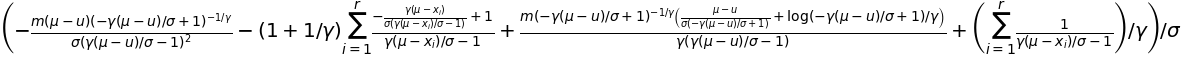

In [16]:
observed_inf[2]

Version après simplification :

$$
\frac{\partial^2 l}{\partial \mu \partial \gamma} = 
  \frac{m(\gamma+1)}{\sigma\gamma} v (1+\gamma v)^{-1/\gamma - 2} 
+ \frac{1}{\sigma} \sum_{i=1}^r (1+\gamma z_i)^{-1} 
- \frac{\gamma+1}{\sigma} \sum_{i=1}^r z_i (1+\gamma z_i)^{-2}
- \frac{m}{\sigma\gamma^2} (1+\gamma v)^{-1/\gamma - 1} \log (1+\gamma v) 
$$

Donc 

$$
E\left[-\frac{\partial^2 l}{\partial \mu \partial \gamma}\right] = 
- \frac{m}{\sigma\gamma} \left(v- \frac{\gamma}{1+2\gamma} \right) (1+\gamma v)^{-1/\gamma - 2} 
+ \frac{m}{\sigma} \left(\frac{\log (1+\gamma v)}{\gamma^2} - \frac{1}{\gamma +1} \right) (1+\gamma v)^{-1/\gamma - 1}
$$

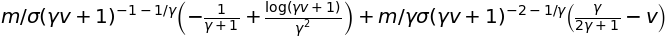

In [17]:
observed_fish[2] = parse_latex(r"\frac{m}{\sigma\gamma}(\frac{\gamma}{1+2\gamma} - v) (1+\gamma v)^{-1/\gamma - 2} + \frac{m}{\sigma}(\frac{\log (1+\gamma v)}{\gamma^2} - \frac{1}{\gamma +1}) (1+\gamma v)^{-1/\gamma - 1}")

observed_fish[2]

### Calcul de $\frac{\partial^2 l}{\partial\sigma^2}$ :

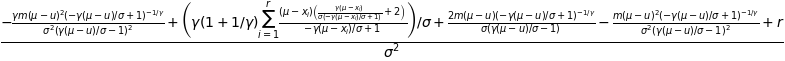

In [18]:
observed_inf[3]

Version après simplification :

$$
\frac{\partial^2 l}{\partial \sigma^2} = 
- \frac{m(\gamma+1)}{\sigma^2} v^2 (1+\gamma v)^{-1/\gamma -2} 
- \frac{2(\gamma+1)}{\sigma^2} \sum_{i=1}^r z_i(1+\gamma z_i)^{-1}
+ \frac{\gamma(\gamma+1)}{\sigma^2} \sum_{i=1}^r z_i^2 (1+\gamma z_i)^{-2}
+\frac{2m}{\sigma^2} v (1+\gamma v)^{-1/\gamma -1}
+ \frac{r}{\sigma^2}
$$

Or 

$$
    E_{N,Z}\left[\sum_{i=1}^N Z_i\{1+\gamma Z_i\}_+^{-1}\right] 
    = \frac{m(1+v+\gamma v)}{\gamma+1} \{1+\gamma v\}_+^{-1/\gamma-1} 
$$
$$
    E_{N,Z}\left[\sum_{i=1}^N Z_i^2\{1+\gamma Z_i\}_+^{-2}\right] =
    \frac{m\left((\gamma+1)(2\gamma+1)v^2+2(2\gamma+1)v+2\right)}{(\gamma+1)(2\gamma+1)} \{1+\gamma v\}_+^{-1/\gamma-2}
$$
$$
E[N] = m(1+\gamma v)^{-1/\gamma}
$$

Donc

$$
E\left[-\frac{\partial^2 l}{\partial \sigma^2}\right] = 
  \frac{2m}{\sigma^2} (1+\gamma v)^{-1/\gamma} 
- \frac{m}{\sigma^2} (1+\gamma v)^{-1/\gamma}
+ \frac{m}{\sigma^2} \left(v^2 + \frac{1}{2\gamma+1}\right) (1+\gamma v)^{-1/\gamma -2}
- \frac{m}{\sigma^2} (1+\gamma v)^{-1/\gamma}
$$

$$
E\left[-\frac{\partial^2 l}{\partial \sigma^2}\right] = 
 \frac{m}{\sigma^2} \left(v^2+\frac{1}{2\gamma+1}\right) (1+\gamma v)^{-1/\gamma -2}
$$


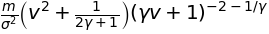

In [19]:
observed_fish[3] = parse_latex(r"\frac{m}{\sigma^2} (v^2+\frac{1}{2\gamma+1}) (1+\gamma v)^{-1/\gamma -2}")

observed_fish[3]

### Calcul de $\frac{\partial^2 l}{\partial\sigma\partial\gamma}$ :

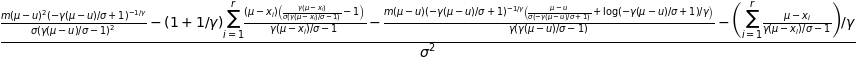

In [20]:
observed_inf[4]

Version après simplification :

$$
\frac{\partial^2 l}{\partial \sigma \partial \gamma} = 
- \frac{m}{\sigma\gamma^2} v(1+\gamma v)^{-1/\gamma - 1} \log (1+\gamma v) 
+ \frac{m(\gamma+1)}{\sigma\gamma} v^2 (1+\gamma v)^{-1/\gamma - 2}
+ \frac{1}{\sigma} \sum_{i=1}^r (1+\gamma z_i)^{-1} z_i 
- \frac{\gamma+1}{\sigma} \sum_{i=1}^r z_i^2(1+\gamma z_i)^{-2}
$$

Après calcul, on obtient pour l'espérance :

$$
E\left[-\frac{\partial^2 l}{\partial \sigma \partial \gamma} \right] = 
\frac{m}{\sigma\gamma(\gamma+1)} (1+\gamma v)^{-1/\gamma }
- \frac{m}{\sigma} v (1+\gamma v)^{-1/\gamma - 1} \left(\frac{1}{\gamma +1} - \log (1+\gamma v)\right)
- \frac{m}{\sigma\gamma} (1+\gamma v)^{-1/\gamma - 2} \left(v^2 + \frac{1}{2\gamma+1}\right)
$$

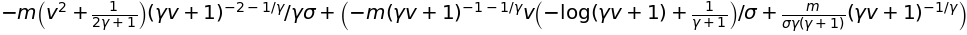

In [21]:
observed_fish[4] = parse_latex(r"\frac{m}{\sigma\gamma(\gamma+1)} (1+\gamma v)^{-1/\gamma } - \frac{m}{\sigma} (1+\gamma v)^{-1/\gamma - 1}v (\frac{1}{\gamma +1} - \log (1+\gamma v))- \frac{m}{\sigma\gamma} (1+\gamma v)^{-1/\gamma - 2} (v^2 + \frac{1}{2\gamma+1})")

observed_fish[4]

### Calcul de $\frac{\partial^2 l}{\partial\gamma^2}$ :

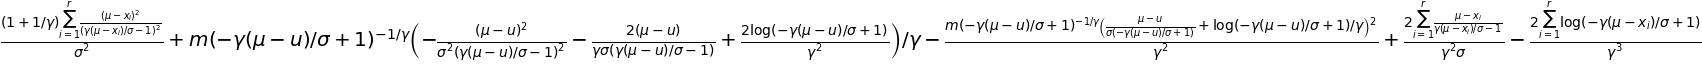

In [22]:
observed_inf[5]

Version après simplification :

$$
\frac{\partial^2 l}{\partial \gamma^2} =
- m (1+\gamma v)^{-1/\gamma} \left[ \frac{1}{\gamma}v^2 (1+\gamma v)^{-2} 
- \frac{2}{\gamma^3}\log(1+\gamma v) 
+ \frac{2}{\gamma^2} v(1+\gamma v)^{-1} 
+ {\left(\frac{1}{\gamma^2}\log (1+\gamma v) 
- \frac{1}{\gamma}v(1+\gamma v)^{-1} \right)}^2 \right] 
- \frac{2}{\gamma^3} \sum_{i=1}^r \log(1+\gamma z_i) \\
+ \frac{2}{\gamma^2} \sum_{i=1}^r z_i(1+\gamma z_i)^{-1} 
+ \frac{\gamma+1}{\gamma} \sum_{i=1}^r z_i^2(1+\gamma z_i)^{-2}
$$

C'est-à-dire :

$$
\frac{\partial^2 l}{\partial \gamma^2} =
-\frac{m(\gamma+1)}{\gamma^2} v^2 (1+\gamma v)^{-1/\gamma-2} 
- \frac{2m}{\gamma^2} v(1+\gamma v)^{-1/\gamma-1} \left( 1 - \frac{1}{\gamma}\log (1+\gamma v) \right)
+ \frac{2m}{\gamma^3}(1+\gamma v)^{-1/\gamma} \log(1+\gamma v) \left( 1 - \frac{1}{2\gamma} \log(1+\gamma v) \right)\\
- \frac{2}{\gamma^3} \sum_{i=1}^r \log(1+\gamma z_i)
+ \frac{2}{\gamma^2} \sum_{i=1}^r z_i(1+\gamma z_i)^{-1} 
+ \frac{\gamma+1}{\gamma} \sum_{i=1}^r z_i^2(1+\gamma z_i)^{-2}
$$

Or on a 
$$
E_{N,Z}\left[\sum_{i=1}^N \log \{1+\gamma Z_i\}_+\right] 
= m(\gamma + \log \{1+\gamma v\}_+) \{1+\gamma v\}_+^{-1/\gamma}
$$
$$
E_{N,Z}\left[\sum_{i=1}^N Z_i\{1+\gamma Z_i\}_+^{-1}\right] 
= \frac{m(1+v+\gamma v)}{\gamma+1} \{1+\gamma v\}_+^{-1/\gamma-1}
$$
$$
E_{N,Z}\left[\sum_{i=1}^N Z_i^2\{1+\gamma Z_i\}_+^{-2}\right] 
= \frac{m\left((\gamma+1)(2\gamma+1)v^2+2(2\gamma+1)v+2\right)}{(\gamma+1)(2\gamma+1)} \{1+\gamma v\}_+^{-1/\gamma-2}
$$

Après calcul, on obtient pour l'espérance : 

$$
E\left[-\frac{\partial^2 l}{\partial \gamma^2}\right] =
  \frac{m}{\gamma^2} (1+\gamma v)^{-1/\gamma} 
- \frac{2m}{\gamma^2(1+\gamma)} (1+\gamma v)^{-1/\gamma-1}
+ \frac{m}{\gamma^2}\left(v^2+\frac{1}{2\gamma +1}\right) (1+\gamma v)^{-1/\gamma-2}\\
- \frac{m}{\gamma^3}(1+\gamma v)^{-1/\gamma-1} \log(1+\gamma v) \left(2v - \frac{1+\gamma v}{\gamma} \log(1+\gamma v)\right)
$$

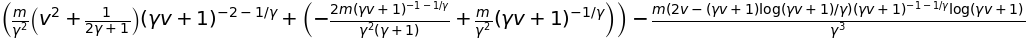

In [23]:
observed_fish[5] = parse_latex(r"\frac{m}{\gamma^2} (1+\gamma v)^{-1/\gamma} - \frac{2m}{\gamma^2(1+\gamma)} (1+\gamma v)^{-1/\gamma-1}+ \frac{m}{\gamma^2}(v^2+\frac{1}{2\gamma +1}) (1+\gamma v)^{-1/\gamma-2}- \frac{m}{\gamma^3}(1+\gamma v)^{-1/\gamma-1} \log(1+\gamma v) (2v - \frac{1+\gamma v}{\gamma} \log(1+\gamma v))")

observed_fish[5]

## Exploitation de la matrice d'information de Fisher

En notant que tout les termes de la matrice d'information de fisher peuvent être factorisé par 
$m(1+\gamma v)^{-1/\gamma -2}$, nous considérons la matrice $\frac{1}{m(1+\gamma v)^{-1/\gamma -2}}I(\theta)$ dans un premier temps.

In [24]:
factor_term = m*(1+gam*v)**(-1/gam -2)

m11 = ((gam + 1)**2)/((sig**2*(2*gam + 1)))
m12 = (1/sig**2)*(-gam/(2*gam + 1) + v)
m13 = (1/sig)*((gam*v + 1)**(-1)*(-1/(gam + 1) + log(gam*v + 1)/gam**2)) \
    + (1/((gam*sig)))*(gam/(2*gam + 1) - v)
m22 = (1/sig**2)*(v**2 + 1/(2*gam + 1))
m23 = -1/(gam*sig)*(v**2 + 1/(2*gam + 1)) - (gam*v + 1)**(-1)*v*(-log(gam*v + 1) \
      + 1/(gam + 1))/sig + (1/((sig*gam*(gam + 1))))*(gam*v + 1)**(-2)
m33 = (1/gam**2)*(v**2 + 1/(2*gam + 1)) - 2/(gam**2*(gam + 1))*(gam*v + 1)**(-1) \
    + (1/gam**2)*(gam*v + 1)**(-2) - (2*v - (gam*v + 1)*log(gam*v + 1)/gam)*(gam*v + 1)**(-1)*log(gam*v + 1)/gam**3



Inf_matrix = Matrix([[m11, m12, m13],
                     [m12, m22, m23],
                     [m13, m23, m33]])
                    
Inf_matrix

⎡                                                                             
⎢                                                                      γ      
⎢                     2                                           - ─────── + 
⎢              (γ + 1)                                              2⋅γ + 1   
⎢            ────────────                                         ────────────
⎢             2                                                          2    
⎢            σ ⋅(2⋅γ + 1)                                               σ     
⎢                                                                             
⎢                γ                                                 2      1   
⎢           - ─────── + v                                         v  + ───────
⎢             2⋅γ + 1                                                  2⋅γ + 1
⎢           ─────────────                                         ────────────
⎢                  2                                

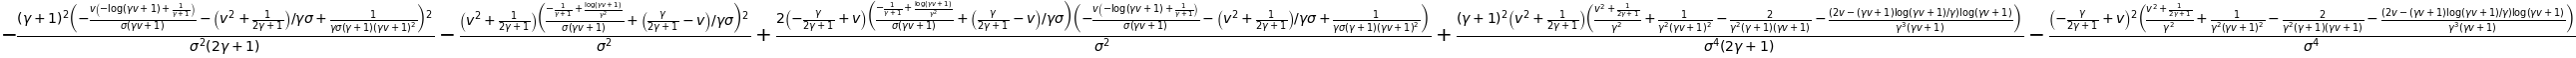

In [25]:
det = Inf_matrix.det()
det

In [53]:
fisher_prior = det*factor_term**3
fisher_prior = sqrt(fisher_prior)

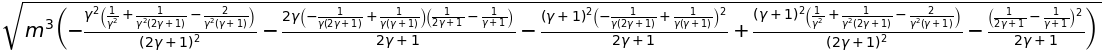

In [54]:
fisher_prior01 = fisher_prior.subs(sig,1).subs(v,0)
fisher_prior01

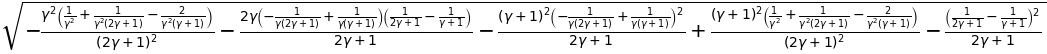

In [55]:
fisher_prior01 = fisher_prior01.subs(m,1)
fisher_prior01

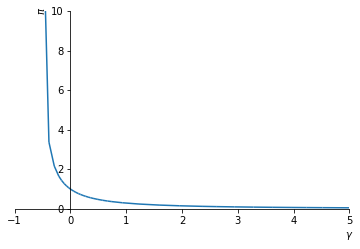

In [47]:
plot(fisher_prior01, 
     xlim=(-1,5),
     ylim = (-1,10),
     xlabel = "$\gamma$",
     ylabel = "$\pi$")

In [66]:
Integral(fisher_prior01, (gam, -0.5, +oo)).evalf()

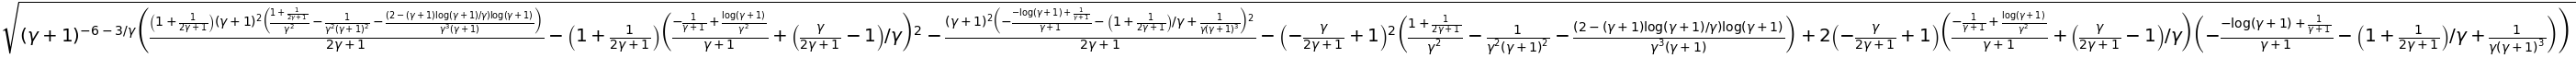

In [35]:
fisher_prior11 = fisher_prior.subs(sig,1).subs(v,1).subs(m,1)
fisher_prior11

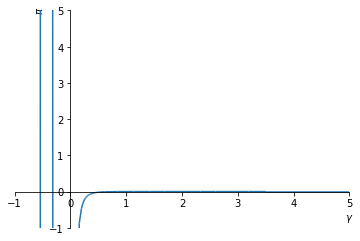

In [43]:
plot(fisher_prior11**2, 
     xlim=(-1,5),
     ylim = (-1,5),
     xlabel = "$\gamma$",
     ylabel = "$\pi$")

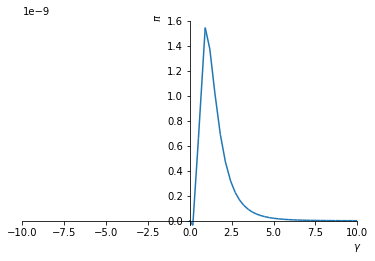

In [65]:
fisher_prior_test = fisher_prior.subs(sig,1).subs(v,20).subs(m,1)
plot(fisher_prior_test**2, 
#      xlim=(-1,5),
#      ylim = (-1,5),
     xlabel = "$\gamma$",
     ylabel = "$\pi$")